In [33]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Read dataset
df = pd.read_csv("Data/1_lebron_james_shot_chart_1_2023.csv")
# df = pd.read_csv("Data/2_james_harden_shot_chart_2023.csv")
# df = pd.read_csv("Data/3_stephen_curry_shot_chart_2023.csv")


In [35]:
print(f"Initial columns: {df.columns.tolist()}\n")

df['score_difference'] = df['lebron_team_score'] - df['opponent_team_score']
# Drop columns
columns_to_drop = [
    "season",
    "color",
    "opponent_team_score",
    "date",
    "qtr",
    "time_remaining",
    "lebron_team_score",
    "lead",
    "opponent",
    "team",
    "top",
    "left",
    "shot_type",
]
df.drop(columns_to_drop, axis=1, inplace=True)

# df = df[df["shot_type"] == 2]

print(f"Final head:\n{df.head()}")

Initial columns: ['top', 'left', 'date', 'qtr', 'time_remaining', 'result', 'shot_type', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent', 'team', 'season', 'color']

Final head:
   result  distance_ft  score_difference
0   False           26                 0
1   False           16                -1
2   False           11                -3
3    True            3                -7
4   False           23                -1


In [36]:
layup_data = df[df["distance_ft"] <= 5]
midrange_data = df[(df["distance_ft"] > 5) & (df["distance_ft"] < 22)]
three_data = df[df["distance_ft"] >= 22]

print(f"Layup data:\n{layup_data.head()}")

Layup data:
    result  distance_ft  score_difference
3     True            3                -7
5     True            1                -1
7     True            2                -1
10   False            2                -8
11    True            1               -10


In [37]:
# Split data
layup_X = layup_data.drop(columns=["result"])
layup_y = layup_data.result.astype("int")
layup_X_train, layup_X_test, layup_y_train, layup_y_test = train_test_split(
    layup_X, layup_y, test_size=0.25, random_state=16
)

midrange_X = midrange_data.drop(columns=["result"])
midrange_y = midrange_data.result.astype("int")
midrange_X_train, midrange_X_test, midrange_y_train, midrange_y_test = train_test_split(
    midrange_X, midrange_y, test_size=0.25, random_state=16
)

three_X = three_data.drop(columns=["result"])
three_y = three_data.result.astype("int")
three_X_train, three_X_test, three_y_train, three_y_test = train_test_split(
    three_X, three_y, test_size=0.25, random_state=16
)


In [38]:
# Initialize model
layup_logreg = LogisticRegression(random_state=16)
layup_logreg.fit(layup_X_train, layup_y_train)
layup_y_pred = layup_logreg.predict(layup_X_test)

midrange_logreg = LogisticRegression(random_state=16)
midrange_logreg.fit(midrange_X_train, midrange_y_train)
midrange_y_pred = midrange_logreg.predict(midrange_X_test)

three_logreg = LogisticRegression(random_state=16)
three_logreg.fit(three_X_train, three_y_train)
three_y_pred = three_logreg.predict(three_X_test)

Confusion matrix: [[  6  29]
 [  7 120]]


Text(0.5, 427.9555555555555, 'Predicted label')

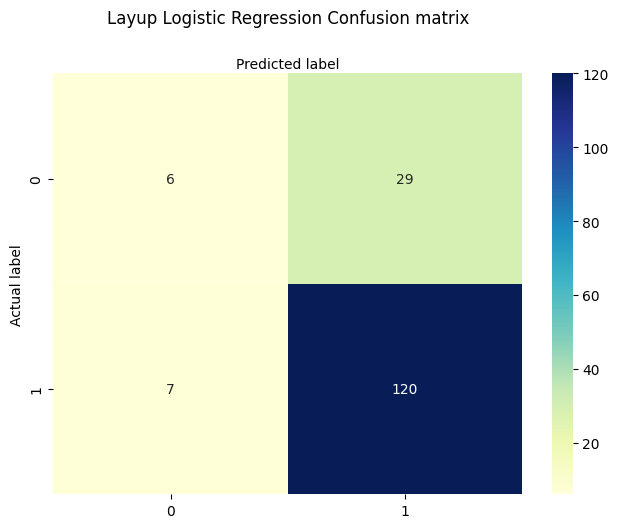

In [39]:
layup_cnf_matrix = metrics.confusion_matrix(layup_y_test, layup_y_pred)
print(f"Confusion matrix: {layup_cnf_matrix}")

class_names = layup_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(layup_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Layup Logistic Regression Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")



Confusion matrix: [[47  0]
 [48  0]]


Text(0.5, 427.9555555555555, 'Predicted label')

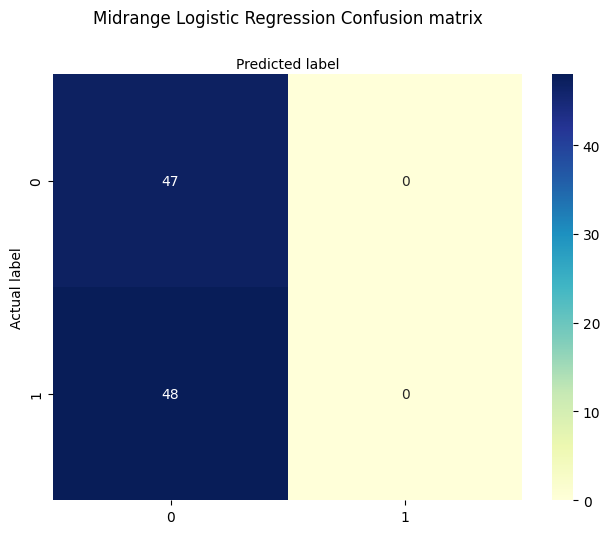

In [40]:
midrange_cnf_matrix = metrics.confusion_matrix(midrange_y_test, midrange_y_pred)
print(f"Confusion matrix: {midrange_cnf_matrix}")

class_names = midrange_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(midrange_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Midrange Logistic Regression Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Confusion matrix: [[87  0]
 [41  0]]


Text(0.5, 427.9555555555555, 'Predicted label')

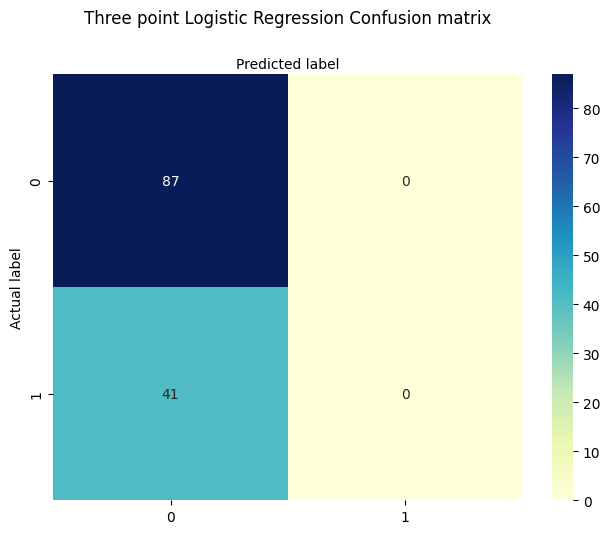

In [41]:
three_cnf_matrix = metrics.confusion_matrix(three_y_test, three_y_pred)
print(f"Confusion matrix: {three_cnf_matrix}")

class_names = three_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(three_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Three point Logistic Regression Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [42]:
# Show metrics
target_names = ["Shot Miss", "Shot Make"]
print(classification_report(y_test, y_pred, target_names=target_names))

NameError: name 'y_test' is not defined

In [118]:
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.3f}")

Cross-validation accuracy: 0.600


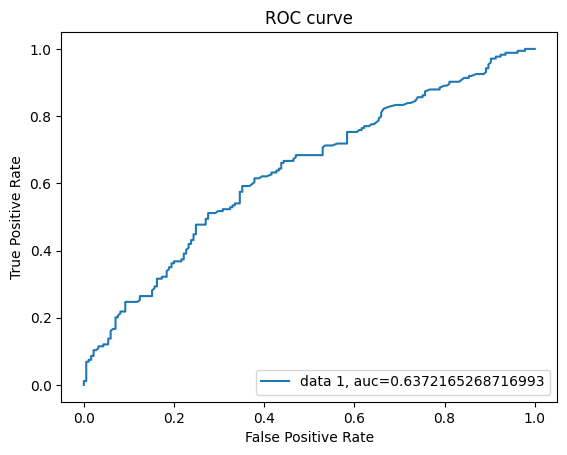

In [119]:
# ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()